In [1]:
import tensorflow
from tensorflow import keras
from keras import layers
import numpy as np
import pydot

2025-04-20 17:47:12.086176: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu") (inputs)
outputs = layers.Dense(10, activation="softmax") (features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
inputs.shape

(None, 3)

In [4]:
inputs.dtype

'float32'

In [5]:
features.shape

(None, 64)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate() ([title, text_body, tags])
features = layers.Dense(64, activation="relu") (features)

priority = layers.Dense(1, activation="sigmoid", name="priority") (features)
department = layers.Dense(
    num_departments, activation="softmax", name="department") (features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])

In [8]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.random(size=(num_samples, num_departments))

In [9]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - department_accuracy: 0.2422 - department_loss: 34.2782 - loss: 34.5932 - priority_loss: 0.3150 - priority_mean_absolute_error: 0.4820
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2939 - department_loss: 12.8400 - loss: 13.1659 - priority_loss: 0.3260 - priority_mean_absolute_error: 0.4896
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [10]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error",
                    "department": "categorical_crossentropy"},
                    metrics={"priority": ["mean_absolute_error"],
                             "department": ["accuracy"]})
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
           {"priority": priority_data,
            "department": department_data},
            epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
                {"priority": priority_data,
                 "department": department_data})
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - department_accuracy: 0.2470 - department_loss: 30.7257 - loss: 31.0739 - priority_loss: 0.3481 - priority_mean_absolute_error: 0.5152
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - department_accuracy: 0.2518 - department_loss: 32.5003 - loss: 32.8263 - priority_loss: 0.3260 - priority_mean_absolute_error: 0.4896
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


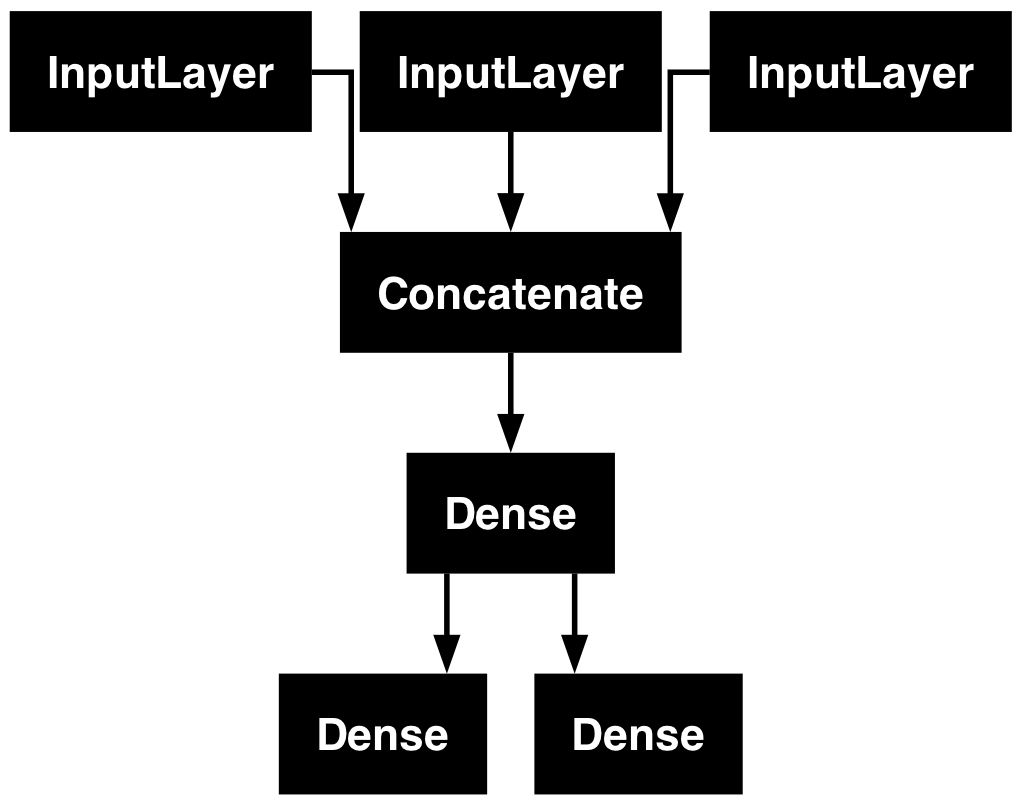

In [11]:
keras.utils.plot_model(model, "ticket_classifier.png")

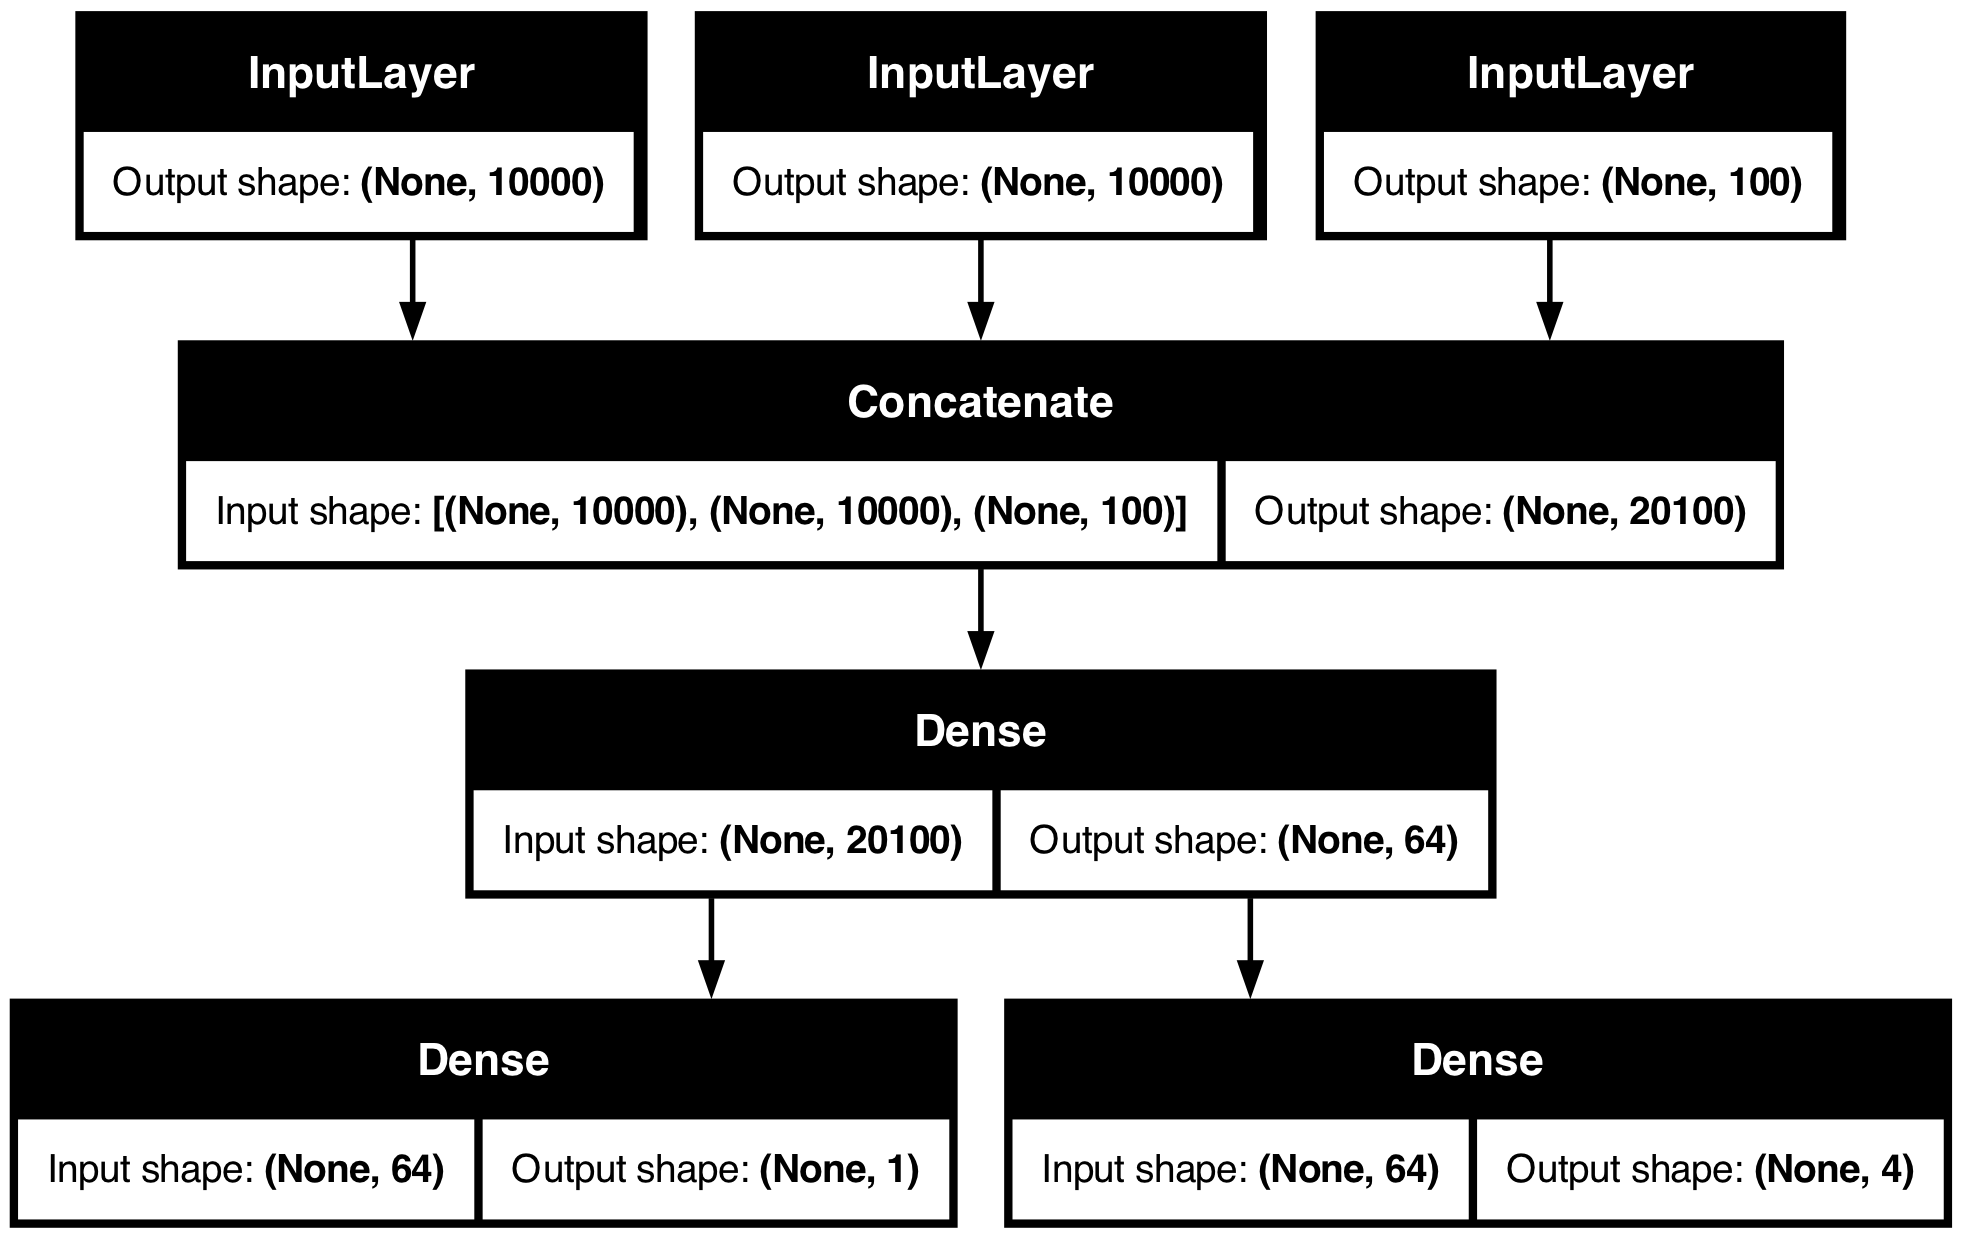

In [12]:
keras.utils.plot_model(model,
                       "ticket_classifier_with_shape_info.png",
                       show_shapes=True)

In [13]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [23]:
print(model.layers[3])

<Dense name=dense_7, built=True>


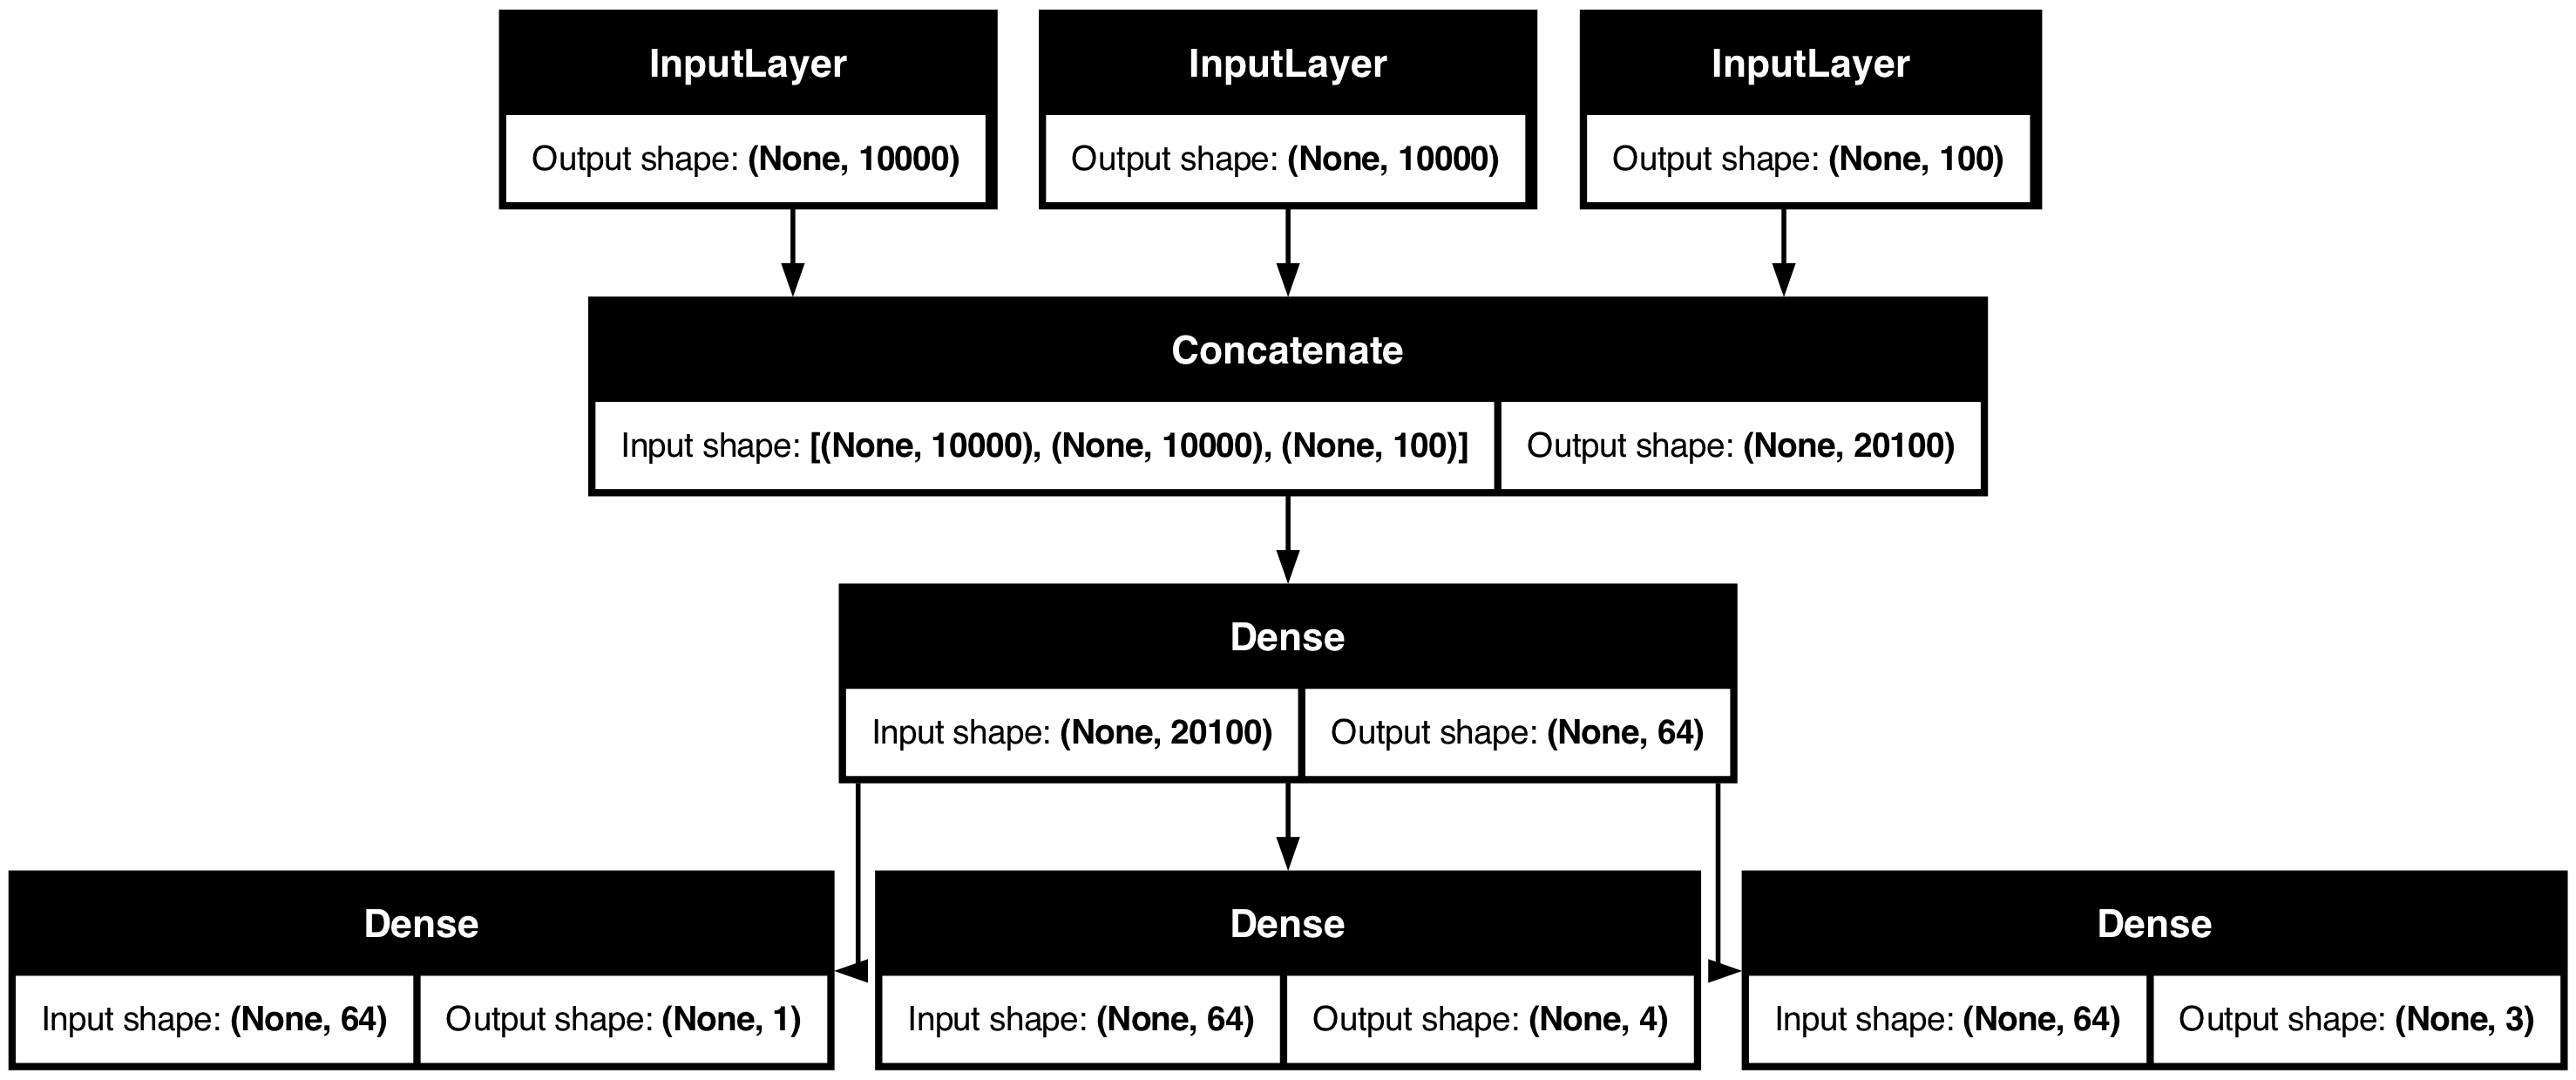

In [14]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty") (features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

keras.utils.plot_model(new_model,
                       "updated_ticket_classifier.png", show_shapes=True)

In [18]:
class CustomerTicketModel (keras.Model):
    def __init__ (self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [19]:
model = CustomerTicketModel(num_departments=4)
priority, department = model({"title": title_data,
                              "text_body": text_body_data,
                              "tags": tags_data})

In [24]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
           [priority_data, department_data],
           epochs=1)
model.evaluate({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
           [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2504 - categorical_crossentropy_loss: 48.9092 - loss: 49.2142 - mean_absolute_error: 0.4731 - mean_squared_error_loss: 0.3051
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2518 - categorical_crossentropy_loss: 27.0032 - loss: 27.3500 - mean_absolute_error: 0.5104 - mean_squared_error_loss: 0.3467
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [25]:
class Classifier (keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

In [26]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu") (inputs)
outputs = Classifier(num_classes=10) (features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid") (inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel (keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
    
model = MyModel()

In [29]:
from keras.datasets import mnist

In [30]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu") (inputs)
    features = layers.Dropout(0.5) (features)
    outputs = layers.Dense(10, activation="softmax") (features)
    model = keras.Model(inputs, outputs)
    return model

In [32]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [33]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8637 - loss: 0.4522 - val_accuracy: 0.9562 - val_loss: 0.1514
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9510 - loss: 0.1725 - val_accuracy: 0.9699 - val_loss: 0.1120
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9629 - loss: 0.1291 - val_accuracy: 0.9714 - val_loss: 0.1072
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1091
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(self, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tensorflow.one_hot(y_true, depth=tensorflow.shape(y_pred) [1])
        mse = tensorflow.reduce_sum(tensorflow.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tensorflow.shape(y_pred) [0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tensorflow.sqrt(self.mse_sum / tensorflow.cast(self.total_samples, tensorflow.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)


In [36]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

ValueError: Cannot interpret `dtype` argument. Expected a string or an instance of DTypePolicy. Received: dtype=<RootMeanSquaredError name=root_mean_squared_error>

In [ ]:
#gonna come back to this